Dimensionality Reduction via Principal Components Analysis (PCA)
================================================================

To understand PCA, check out the slides that accompany this code sample at [bitly.com/adi-pca-slides](http://bitly.com/adi-pca-slides).

Example 1: Point cloud
======================

Setup
-----
We'll be using [PCA from scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), a commonly used machine learning library in Python.

You will need to install some dependencies first if you haven't already. On Linux or Mac, you can run

```
sudo easy_install pip
```

to get a Python package manager called pip. Then run

```
pip install -U numpy
pip install -U scipy
pip install -U scikit-learn
```

to get scikit-learn.

In [14]:
# import relevant libraries

# for PCA
from sklearn.decomposition import PCA

# for plotting in 3D
from mpl_toolkits.mplot3d import Axes3D

# for data types
import numpy as np

# for general plotting
import matplotlib.pyplot as plt

# for statistical functions
from scipy import stats

# this will embed pictures into the notebook
%matplotlib inline

Create data
-----------
Now we will create a pathological case dataset to really demonstrate the use of PCA. Let's create a point cloud which is very flat in one direction. This way we can show that PCA "discards it" to reduce dimensionality since it doesn't contribute much information.

In [15]:
e = np.exp(1)
np.random.seed(4)

def pdf(x):
    """
    Compute probability distribution function.
    """
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

Apply PCA and plot
------------------
We'll now plot the point cloud and the results of PCA from multiple angles so you can see the effect of dimensionality reduction visually.

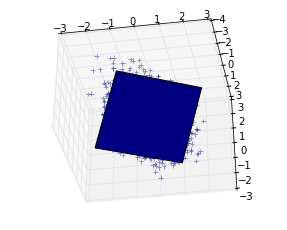

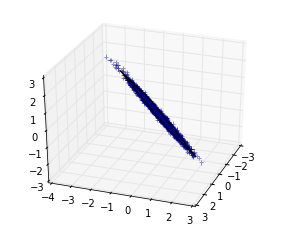

In [16]:
def plot_figs(fig_num, elev, azim):
    """
    Function to apply PCA to dataset and plot figure.
    """
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    
    # create 3D axis
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    # plot every 3rd element in our dataset
    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # perform PCA and reduce to 3 principal components
    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    
    # get the principal components
    V = pca.components_
    x_pca_axis, y_pca_axis, z_pca_axis = V.T * pca_score / pca_score.min()
    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    
    # setup the plane as result from PCA
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    
    # plot the plane
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)

# view the results from 2 different angles
elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

Example 2: Eigenfaces
=====================

Summary
-------
We'll be using an old dataset of creepy grayscale faces from AT&T called the [Olivetti Faces](http://scikit-learn.org/stable/datasets/olivetti_faces.html). Images of human faces are really complex. If we want to do facial recognition, we need to simplify them first. PCA is a great way to capture the distinctive features of a person's face that might help us in classifying them. So in this example, we're going to extract and plot only the principal components from the faces. Be warned, the results look a bit spooky.

Dataset consists of 400 faces
Extracting the top 6 components for PCA


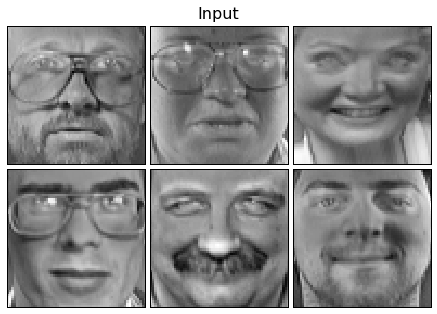

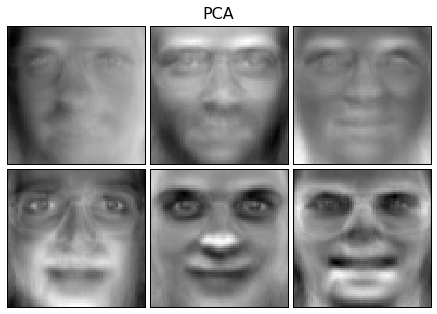

In [27]:
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition

n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    """
    Helper function to plot images.
    """
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Plot a sample of the input data
plot_gallery("Input", faces_centered[:n_components])

# Apply PCA and plot results
print("Extracting the top %d components" % (n_components))
data = faces_centered
# We use a variant of PCA called Randomized PCA for efficiency. It uses stochastic SVD.
estimator = decomposition.RandomizedPCA(n_components=n_components, whiten=True)
estimator.fit(data)
plot_gallery('PCA',components_[:n_components])

plt.show()
